# Decision Trees

Decision trees are commonly used supervised machine learning algorithms that can be employed for both classification and regression tasks. In a decision tree, there is a parent node called the `root node`, which doesn't have a parent node but has multiple child nodes. Additionally, there are `internal nodes` that have both child nodes and parent nodes, and `leaf nodes` that have only child nodes.

In decision trees, node splitting can be carried out in two different ways. One method is based on `Information Gain (Entropy)`, and the other is based on `Gini Impurity`. In this tutorial, let's explore the `Information Gain (Entropy)` method.

## Step 1 : Importing Necessary Libraries

`sklearn` is an important and big module used in machine learning for Python. So we will be importing necessary libraries from sklearn.

`sklearn.model_selection.train_test_split` is used for splitting the training and test data.

`sklearn.tree.DecisionTreeClassifier` is used for constructing the decision tree.

`sklearn.tree` is used in plotting the tree objects.

`sklearn.metrics.confusion_matrix` is used for computing the confusion matrix of the model.

`sklearn.metrics.accuracy_score` is used for computing the accuracy of the model.


Apart from these libraries `matplotlib.pyplot` and `graphviz` are used for visualisation purposes and `pandas` and `numpy` are used for data manipulation.

In [1]:
# importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix,accuracy_score


import matplotlib.pyplot as plt
import graphviz 


import pandas as pd
import numpy as np

import warnings

In [2]:
# not displaying the warnings
warnings.filterwarnings("ignore")

## Step 2 : Data Cleaning and Manipulation

In this step data is read from the csv file and stored as dataframe. The main important step is data cleaning as without cleaning there is a high chance that the model may yeild inaccurate results. Following that data preparation comes in which changes from model to model. 

Decision trees in python only accept numeric data as input so, it must be ensured only numeric data is passed on. And then the input and output labels are seperated and data is split into two sets one for training (70%) and another for testing (30%).

### Small overview of data
The data which will be used in this tutorial Admissions data which has 88 rows in total and has 4 features ( GPA, WorkExp, TestScore and WritingScore). The target variable is Decision which has 3 classes (Admit, Wait and Decline)

In [3]:
# reading the file
df = pd.read_csv("StudentSummerProgramData_Numeric_Labeled.csv")
df.head()

,GPA,WorkExp,TestScore,WritingScore,Decision
0,3.90,6.7,962,100,Admit
1,3.80,1.4,969,97,Admit
2,3.80,2.3,970,98,Admit
3,3.60,0.9,969,97,Admit
4,3.92,1.2,969,95,Admit


In [4]:
# checking for null
df.isna().sum()

GPA             0
WorkExp         0
TestScore       0
WritingScore    0
Decision        0
dtype: int64

In [5]:
# checking whether the datatypes are correct
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GPA           88 non-null     float64
 1   WorkExp       88 non-null     float64
 2   TestScore     88 non-null     int64  
 3   WritingScore  88 non-null     int64  
 4   Decision      88 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 3.6+ KB


In [6]:
# splitting the data into training and testing samples
df_train, df_test = train_test_split(df, test_size=0.3, random_state=123)

In [7]:
# storing the target variable of training set in a new variable
train_labels=df_train["Decision"]  
print(train_labels)

21      Admit
62    Decline
19      Admit
75       Wait
86       Wait
       ...   
47    Decline
57    Decline
83       Wait
17      Admit
66       Wait
Name: Decision, Length: 61, dtype: object


In [8]:
# storing the target variable of testing set in a new variable
test_labels=df_test["Decision"]  
print(test_labels)

4       Admit
84       Wait
56    Decline
35    Decline
45    Decline
28      Admit
71       Wait
53    Decline
81       Wait
23      Admit
60    Decline
8       Admit
51    Decline
82       Wait
29      Admit
54    Decline
72       Wait
58    Decline
37    Decline
38    Decline
80       Wait
59    Decline
65       Wait
31      Admit
24      Admit
41    Decline
9       Admit
Name: Decision, dtype: object


In [9]:
# dropping the target variable from training set
df_train = df_train.drop(["Decision"], axis=1)  
print(df_train)

     GPA  WorkExp  TestScore  WritingScore
21  3.58      0.8        969            93
62  3.21      1.7        766            79
19  3.65      1.7        963            90
75  3.43      1.5        869            85
86  3.47      2.2        867            77
..   ...      ...        ...           ...
47  3.00      1.2        768            77
57  3.01      1.4        769            69
83  3.53      3.3        862            85
17  3.70      2.7        799            97
66  3.55      2.2        866            74

[61 rows x 4 columns]


In [10]:
# dropping the target variable from testing set
df_test = df_test.drop(["Decision"], axis=1)  ##drop labels
print(df_test)

     GPA  WorkExp  TestScore  WritingScore
4   3.92      1.2        969            95
84  3.52      0.7        868            81
56  3.32      1.7        768            78
35  3.56      3.7        899            78
45  3.33      1.6        766            81
28  3.59      1.7        969            93
71  3.50      3.5        869            83
53  2.77      3.7        763            73
81  3.55      2.0        853            81
23  3.92      2.8        967            95
60  3.56      1.7        769            81
8   3.90      4.7        961            93
51  3.44      3.2        757            74
82  3.54      1.2        868            83
29  3.66      0.9        956            89
54  3.18      1.4        768            72
72  3.39      1.8        866            82
58  3.33      0.8        768            70
37  3.71      0.7        789            82
38  3.74      1.3        800            56
80  3.56      1.3        869            84
59  2.91      6.2        753            77
65  3.50   

## Step 3: Building a Decision Tree Model

This is the step in which Decision tree model is built. There are two criterions for splitting the tree. In this tutorial entropy is used and there are two types of splitter one is best and other is random. Best is used in this case. 

[Text(0.625, 0.875, 'x[2] <= 915.5\nentropy = 1.546\nsamples = 61\nvalue = [27, 16, 18]'),
 Text(0.5, 0.625, 'x[2] <= 827.0\nentropy = 1.156\nsamples = 35\nvalue = [1, 16, 18]'),
 Text(0.25, 0.375, 'x[2] <= 794.0\nentropy = 0.337\nsamples = 16\nvalue = [1, 15, 0]'),
 Text(0.125, 0.125, 'entropy = 0.0\nsamples = 15\nvalue = [0, 15, 0]'),
 Text(0.375, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.75, 0.375, 'x[0] <= 3.685\nentropy = 0.297\nsamples = 19\nvalue = [0, 1, 18]'),
 Text(0.625, 0.125, 'entropy = 0.0\nsamples = 18\nvalue = [0, 0, 18]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.75, 0.625, 'entropy = 0.0\nsamples = 26\nvalue = [26, 0, 0]')]

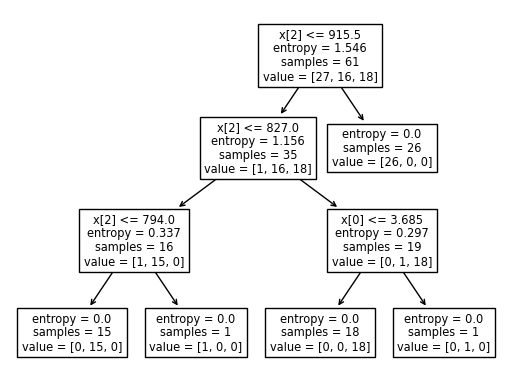

In [11]:
# building the decision tree model
dt=DecisionTreeClassifier(criterion='entropy', 
                            splitter='best') 

# training the model with training data and labels
dt.fit(df_train, train_labels)

# plotting the tree plot
tree.plot_tree(dt)

## Step 4 : Visualization

Once the model is built, the tree can be visualized using various graphs for getting a clear picture and how they are being split.

In [12]:
# visualizing the tree
tree_graph = tree.export_graphviz(dt, out_file=None,
                  feature_names=df_train.columns,
                  filled=True, 
                  rounded=True,  
                  special_characters=True) 
                                   
graph = graphviz.Source(tree_graph) 
graph.render("Tree_Record_Entropy") 



'Tree_Record_Entropy.pdf'

![](Entropy.png)

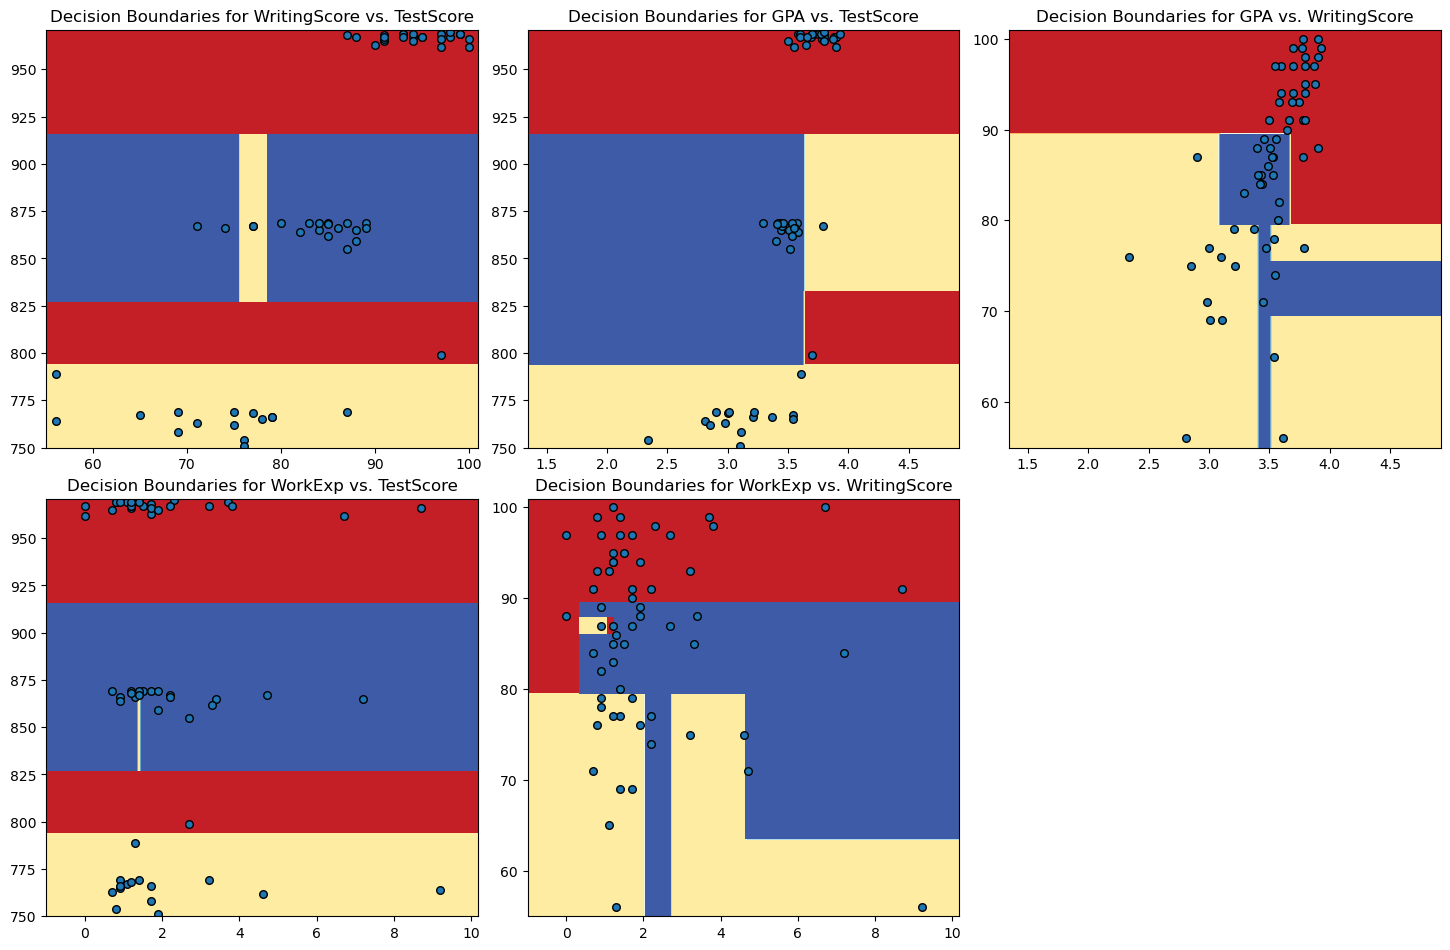

In [13]:
# plotting decision boundaries based on pairwise features
f1 = df_train.columns.get_loc("WritingScore")
f2 = df_train.columns.get_loc("TestScore")

n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

plt.figure(figsize=(15, 10))

for pairidx, pair in enumerate([[f1, f2], [0, 2], [0, 3], [1, 2], [1, 3]]):
    X = df_train.iloc[:, pair]
    y = train_labels.replace("Admit", 0).replace("Decline", 1).replace("Wait", 2)
    
    DTC = DecisionTreeClassifier().fit(X, y)
    
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = DTC.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
       
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=30, label=y, edgecolor='black', cmap=plt.cm.RdYlBu)
    
    # Add title
    plt.title(f'Decision Boundaries for {df_train.columns[pair[0]]} vs. {df_train.columns[pair[1]]}')


plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
plt.show()

In [14]:
# checking the counts of each category of training data
train_labels.value_counts()

Decision
Admit      27
Wait       18
Decline    16
Name: count, dtype: int64

## Step 5 : Assesing the performance of model

After building the model, its performance can be analyzed by predicting it on a test dataset. Subsequently, a confusion matrix can be computed to evaluate how the model has classified instances, and the accuracy score can be assessed to gauge overall performance.

In [24]:
# constructing the confusion matrix
y_pred = dt.predict(df_test)
cm = confusion_matrix(test_labels,y_pred)
print(cm)

# computing the accuracy score 
accuracy_score(test_labels,y_pred)

[[ 8  0  0]
 [ 1 10  1]
 [ 0  0  7]]


0.9259259259259259

In [15]:
# checking the counts of each category of testing data
test_labels.value_counts()

Decision
Decline    12
Admit       8
Wait        7
Name: count, dtype: int64

In [21]:
# displaying the features
feature_names =df_train.columns
FeatureImpR=dt.feature_importances_   
indicesR = np.argsort(FeatureImpR)[::-1]
indicesR
print ("feature name: ", feature_names[indicesR])

feature name:  Index(['TestScore', 'GPA', 'WritingScore', 'WorkExp'], dtype='object')


In [19]:
# listing the important features
for f in range(df_train.shape[1]):
    if FeatureImpR[indicesR[f]] > 0:
        print("%d. feature %d (%f)" % (f + 1, indicesR[f], FeatureImpR[indicesR[f]]))
        print ("feature name: ", feature_names[indicesR[f]])

1. feature 2 (0.940086)
feature name:  TestScore
2. feature 0 (0.059914)
feature name:  GPA
